<a href="https://colab.research.google.com/github/trevor-webster/2024Fall-MOCS/blob/main/Assignment2CellularAutomata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment #2**
Carina Manitius, Trevor Webster, Derek Devine, Nate Borland

# 1

# City Growth

$$X_{N+1} = r X_N(1-X_N)$$

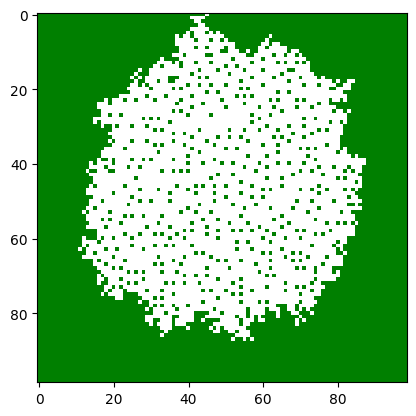

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

import time

# chance to turn into a city for each possible number of city neighbors
chance_0 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_1 = 1 # @param {type:"slider", min:0, max:1, step:0.01}
chance_2 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_3 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_4 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_5 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_6 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_7 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_8 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
r_growth_rate   = 0.8 # @param {type:"slider", min:0, max:1, step:0.01}
# listed for easy indexing
chances = [chance_0, chance_1, chance_2, chance_3, chance_4, chance_5, chance_6, chance_7, chance_8]
K = 9 - 1
# displays the current state of world cells
def display_world(world):
    plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
    display.display(plt.gcf())
    display.clear_output(wait=True)

# counts up the city neighbors of the world cell at [i,j]
def count_city_neighbors(world, world_size, i, j):
    neighborhood = world[max(i-1,0):min(i+2,world_size), max(j-1,0):min(j+2,world_size)]
    count = np.count_nonzero(neighborhood)
    # for k in range(len(neighborhood)):
    #     for l in range(len(neighborhood[k])):
    #         if (k != i or l != j) and neighborhood[k][l] == 1:
    #             count+=1
    # for k in range(max(0, i-1), min(world_size, i+2)):
    #     for l in range(max(0, j-1), min(world_size, j+2)):
    #         # if (k != i or l != j) and world[k,l] == 1:
    #         if world[k][l] == 1:
    #             count += 1
    
    return count

def logistic_rule(neighbor_count):
    return np.random.rand() < r_growth_rate * (neighbor_count/K) * (1 - (neighbor_count/K))

## Explicit zoning rules for each neighbor count
def rule(neighbor_count):
    return (chances[neighbor_count] > 0 and np.random.rand() < chances[neighbor_count])

def update_world(world, world_size):
    next_world = world.copy()
    reached_edge = False
    for i in range(world_size):
        for j in range(world_size):
            if world[i][j] == 1:
                continue
            neighbor_count = count_city_neighbors(world, world_size,i,j)
            if(logistic_rule(neighbor_count)):
                next_world[i,j] = 1
                if i == 0 or j == 0 or i == world_size-1 or j == world_size-1:
                    reached_edge = True
            
    # print(next_world)
    return (next_world, reached_edge)

size = 99
world = np.zeros((size,size))
# world = np.arange(size**2).reshape(size,size)
# print(world)
# i = 6
# j = 6
# print(get_neighborhood(world,size,i,j))
world[size//2,size//2] = 1
reached_edge = False
n = 0
while not reached_edge:
    display_world(world)
    time.sleep(0.1)
    (world, reached_edge) = update_world(world, size)
display_world(world)
